# Построение графиков

Для построения графиков чаще всего используется `matplotlib.pyplot`. Боль информации можно найти [здесь](https://nbviewer.jupyter.org/github/whitehorn/Scientific_graphics_in_python/tree/master/).

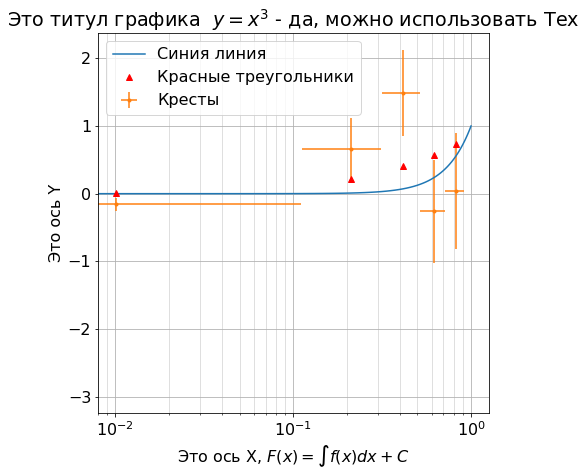

<Figure size 432x288 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 16 # Управление стилем, в данном случаем - размером шрифта 

 # Создаем фигуру
plt.figure(figsize=(7,7))

# Подписываем оси и график
plt.title(r"Это титул графика  $y = x^3$ - да, можно использовать Tex")
plt.ylabel("Это ось Y")
plt.xlabel(r"Это ось X, $F(x) = \int f(x) dx + C$")

# Логарифмический масштаб по оси x (аналогично для y)
plt.xscale('log')

# Добавляем данные
x = np.linspace(-1,1,100)
y = x**3
plt.plot(x,y, label="Синия линия")

# Еще данные
x2 = x[::10]
y2 = np.sin(x2)
plt.plot(x2,y2, 'r^', label='Красные треугольники')
# 'r^' - задает стиль линии - красные (red) треугольники (^) подробнее в документации

# Данные с ошибками
mu = np.sin(x2)
sigma = np.abs(mu)**0.5
y2 = np.random.normal(mu, sigma)
plt.errorbar(x2,y2, yerr=sigma, xerr=0.1, fmt='.', label='Кресты') # Можно рисовать ошибки

# Активируем сетку
plt.grid(b=True, which='major', axis='both', alpha=1)
plt.grid(b=True, which='minor', axis='both', alpha=0.5)

# Активируем легенду графика
plt.legend()
# Показать график
plt.show()
# Сохраняем изображение в текущую директорию
plt.savefig('example.png')

# Фитирование

### TODO: написать про методы фитирования

Для приближения функции многочленом можно использовать `numpy.polyfit()`

[2.95685863 5.29013289 8.92291721]
[[ 6.00177164e-03 -5.80947562e-19 -6.11291556e-02]
 [-5.80947562e-19  4.74214056e-02 -1.55033517e-17]
 [-6.11291556e-02 -1.55033517e-17  1.10560757e+00]]
a = 2.9568586294111134 +- 0.07747110196729454
b = 5.290132888466058 +- 0.21776456449760184
c = 8.922917214804441 +- 1.0514787526166773


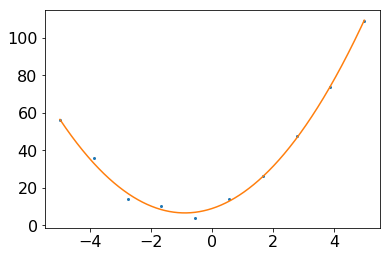

In [51]:
z = np.linspace(-5, 5, 1000)

# Данные
x = np.linspace(-5, 5, 10)
y = 3*x**2 + 5*x + 1 + 10*np.random.sample(len(x))

# Фитируем многочленом второй степени с рассчетом матрицы ошибок
params, cov = np.polyfit(x, y, 2, cov=True)
plt.plot(x, y, 'o', markersize=2)
plt.plot(z, params[0] * z**2 + params[1] * z + params[2])
print(params)
print(cov)
print(f"a = {params[0]} +- {np.sqrt(cov[0][0])}")
print(f"b = {params[1]} +- {np.sqrt(cov[1][1])}")
print(f"c = {params[2]} +- {np.sqrt(cov[2][2])}")

Для приближения функции произвольной функцией можно использовать `scipy.optimize.curve_fit()`.

[ 45.40114559 341.39906678  88.62304246]
[[17.35905932 -6.77377934  0.75023018]
 [-6.77377934  4.29974581 -2.95671194]
 [ 0.75023018 -2.95671194 10.18644967]]
a = 45.40114558946729 +- 4.1664204441191774
b = 341.3990667805358 +- 2.073582843785111
c = 88.62304246493818 +- 3.1916217927856505


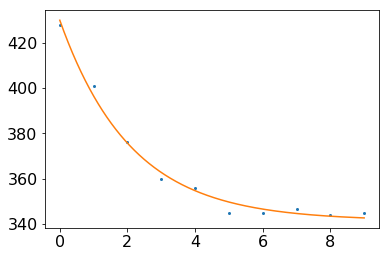

In [53]:
from scipy.optimize import curve_fit

# Функция, которой нужно приблизить зависимость
def fit_func(x, a, b, c):
    return c*np.exp(-x*1.9*11.34/a)+b

# Данные
z = np.linspace(0, 9, 1000)
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [428.,  401.,  376.,  360.,  356.,  345.,  345.,  346.5, 344.,  345.]

# Получение параметров и ошибок по функции и точкам, с указанием начальных параметров
params, cov = curve_fit(fit_func, x, y, p0 = [30, 345, 100])
print(params)
print(cov)

plt.plot(x, y, 'o', markersize=2)
plt.plot(z, fit_func(z, params[0], params[1], params[2]))

print(f"a = {params[0]} +- {np.sqrt(cov[0][0])}")
print(f"b = {params[1]} +- {np.sqrt(cov[1][1])}")
print(f"c = {params[2]} +- {np.sqrt(cov[2][2])}")

# Примеры

Примеры обработки лабораторных работ по курсу общей физики V и VI семестров можно найти в папке labs. Эти примеры не претендуют на правильность/рациональность/корректрость/etc.

# Полезные сслыки

* [Питонтьютор](https://pythontutor.ru)
* [Python3 для начинающих](https://pythonworld.ru)
* [Научная графика в Python](https://nbviewer.jupyter.org/github/whitehorn/Scientific_graphics_in_python/tree/master/)
* [Про Python Notebook](https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb)
* [Задать вопрос составителям](https://t.me/mipt_npm). Или [вот так](https://vk.com/ta_nyan).